In [1]:
import numpy as np
from numpy import linalg as al
import networkx as nx
#import scipy
#from scipy import coo_array


def eigenvalores(A):
    av=list(al.eigh(A))

    av[0]=av[0].astype(float)
    av[1]=av[1].astype(float)

    for i in range(len(av[0]-1)):
        av[0][i]=round(float(av[0][i]),8)
    
    return np.sort(av[0])

def eigenvectores(A):
    av=list(al.eigh(A))

    av[1]=av[1].astype(float)

    for i in range(len(av[1]-1)):
        for j in range(len(av[1][i]-1)):
            av[1][i][j]=round(float(av[1][i][j]),8)
    return av[1].T

def potencia(matriz,n):
    temp=matriz
    for i in range(n-1):
        matriz=matriz.dot(temp)
    return(matriz)

Creamos el grafo e imprimimos sus vertices y aristas.

Los vértices: ['1', '2', '3', '4', '5', '6', '7']
Las aristas: [('1', '2'), ('2', '3'), ('2', '4'), ('3', '5'), ('4', '5'), ('5', '6'), ('6', '7')]


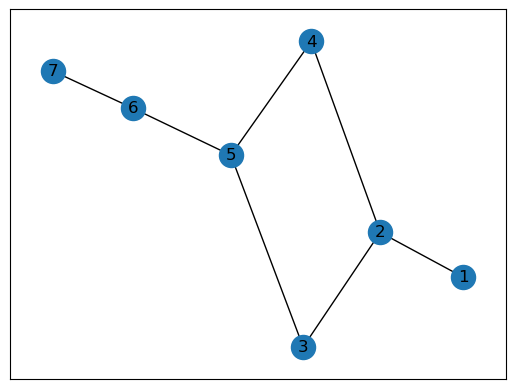

In [2]:
G=nx.Graph()
G.add_nodes_from(['1','2','3','4','5','6','7'])
G.add_edges_from([('1','2'),('2','3'),('2','4'),('4','5'),('3','5'),('5','6'),('6','7')])
nx.draw_networkx(G)
print('Los vértices:', G.nodes())
print('Las aristas:',G.edges())

Calculamos la matriz laplaciana.

In [3]:
L=nx.laplacian_matrix(G)
print(type(L))
L=L.toarray()
print(L)

<class 'scipy.sparse._csr.csr_matrix'>
[[ 1 -1  0  0  0  0  0]
 [-1  3 -1 -1  0  0  0]
 [ 0 -1  2  0 -1  0  0]
 [ 0 -1  0  2 -1  0  0]
 [ 0  0 -1 -1  3 -1  0]
 [ 0  0  0  0 -1  2 -1]
 [ 0  0  0  0  0 -1  1]]


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Por último vamos a calcular los eigenvalores y los correspondientes eigenvectores normalizados.

In [4]:
print('Los eigenvalores del laplaciano:')
print(eigenvalores(L))
print('Eigenvectores normalizados son: ')
print(eigenvectores(L))

Los eigenvalores del laplaciano:
[-0.          0.35881352  1.          2.          2.27625788  3.58921574
  4.77571286]
Eigenvectores normalizados son: 
[[-0.37796447 -0.37796447 -0.37796447 -0.37796447 -0.37796447 -0.37796447
  -0.37796447]
 [-0.48008491 -0.30782395 -0.16646777 -0.16646777  0.03461929  0.42437155
   0.66185356]
 [-0.70710678 -0.          0.35355339  0.35355339  0.35355339 -0.
  -0.35355339]
 [-0.          0.         -0.70710678  0.70710678  0.          0.
  -0.        ]
 [-0.21432922  0.27353936  0.20615059  0.20615059 -0.33049008 -0.65149077
   0.51046954]
 [-0.24767053  0.64127244 -0.06508864 -0.06508864 -0.53783254  0.44707669
  -0.17266877]
 [ 0.1392251  -0.525674    0.39711049  0.39711049 -0.57659069  0.22963852
  -0.06081991]]
